In [25]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#import pandas_datareader.data as web
from scipy import fftpack
import datetime

import yfinance as yf
import pandas_datareader as web

import quandl

In [2]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 downloaded


In [3]:
data

Adj Close           Close            High             Low          \
                AAPL     SPY    AAPL     SPY    AAPL     SPY    AAPL     SPY   
Date                                                                           
2017-01-03    110.95  213.84  116.15  225.24  116.33  225.83  114.76  223.88   
2017-01-04    110.83  215.11  116.02  226.58  116.51  226.75  115.75  225.61   
2017-01-05    111.39  214.94  116.61  226.40  116.86  226.58  115.81  225.48   
2017-01-06    112.64  215.71  117.91  227.21  118.16  227.75  116.47  225.90   
2017-01-09    113.67  215.00  118.99  226.46  119.43  227.07  117.94  226.42   
...              ...     ...     ...     ...     ...     ...     ...     ...   
2017-04-24    137.81  226.15  143.64  237.17  143.95  237.41  143.18  234.56   
2017-04-25    138.66  227.46  144.53  238.55  144.90  238.95  143.87  237.81   
2017-04-26    137.85  227.32  143.68  238.40  144.60  239.53  143.38  238.35   
2017-04-27    137.95  227.51  143.79  238.60  144.16  238.95  143.31  237.98   
2017-04-28    137.82  227.02  143.65  238.08  144.30  238.93  143.27  237.93   

              Open            Volume             
              AAPL     SPY      AAPL        SPY  
Date                                             
2017-01-03  115.80  225.04  28781900   91366500  
2017-01-04  115.85  225.62  21118100   78744400  
2017-01-05  115.92  226.27  22193600   78379000  
2017-01-06  116.78  226.53  31751900   71559900  
2017-01-09  117.95  226.91  33561900   46939700  
...            ...     ...       ...        ...  
2017-04-24  143.50  237.18  17134300  119209900  
2017-04-25  143.91  237.91  18871500   76698300  
2017-04-26  144.47  238.51  20041200   84702500  
2017-04-27  143.92  238.77  14246300   57410300  
2017-04-28  144.09  238.90  20860400   63532800  

[81 rows x 12 columns]

In [16]:
np.log(data[('Adj Close', 'AAPL')].values)

array([4.71213941, 4.7109706 , 4.71608525, 4.7271223 , 4.73628616,
       4.73725053, 4.7426687 , 4.73847655, 4.73672463, 4.7447582 ,
       4.74467122, 4.74293013, 4.7447582 , 4.74536682, 4.74449725,
       4.76029182, 4.76071989, 4.76080548, 4.75823456, 4.75591507,
       4.81510691, 4.81340312, 4.81769758, 4.82695281, 4.83644062,
       4.84032136, 4.84756719, 4.84528884, 4.85405945, 4.86699584,
       4.87060665, 4.86945568, 4.87213922, 4.87931099, 4.88234727,
       4.87809389, 4.87908289, 4.88105798, 4.88143736, 4.90171289,
       4.89574806, 4.90163855, 4.89843664, 4.89977822, 4.89604715,
       4.89372688, 4.89701857, 4.8974666 , 4.89597239, 4.90645926,
       4.90808564, 4.90312432, 4.91353685, 4.90208451, 4.91331643,
       4.90978312, 4.90779013, 4.90948811, 4.93000352, 4.93216912,
       4.93087033, 4.92899131, 4.92928062, 4.93670167, 4.93151993,
       4.92899131, 4.92674631, 4.92558563, 4.91478497, 4.91595825,
       4.91066762, 4.91617808, 4.91169855, 4.90801177, 4.92049

In [17]:
data[('Adj Close', 'AAPL')].values

array([111.29, 111.16, 111.73, 112.97, 114.01, 114.12, 114.74, 114.26,
       114.06, 114.98, 114.97, 114.77, 114.98, 115.05, 114.95, 116.78,
       116.83, 116.84, 116.54, 116.27, 123.36, 123.15, 123.68, 124.83,
       126.02, 126.51, 127.43, 127.14, 128.26, 129.93, 130.4 , 130.25,
       130.6 , 131.54, 131.94, 131.38, 131.51, 131.77, 131.82, 134.52,
       133.72, 134.51, 134.08, 134.26, 133.76, 133.45, 133.89, 133.95,
       133.75, 135.16, 135.38, 134.71, 136.12, 134.57, 136.09, 135.61,
       135.34, 135.57, 138.38, 138.68, 138.5 , 138.24, 138.28, 139.31,
       138.59, 138.24, 137.93, 137.77, 136.29, 136.45, 135.73, 136.48,
       135.87, 135.37, 137.07, 136.9 , 138.22, 139.08, 138.26, 138.37,
       138.23])

# pandas_reader

In [5]:
netflix = web.get_data_yahoo("NFLX",
                            start = "2009-01-01",
                            end = "2018-03-01")

In [6]:
netflix_daily_returns = netflix['Adj Close'].pct_change()
netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()

In [22]:
netflix_daily_returns

Date
2009-01-02         NaN
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
2009-01-08    0.013452
                ...   
2018-02-23    0.028007
2018-02-26    0.028783
2018-02-27   -0.012068
2018-02-28    0.002650
2018-03-01   -0.003398
Name: Adj Close, Length: 2306, dtype: float64

In [24]:
df = web.get_data_tiingo('GOOG', api_key="a57e6412f19c349b21e3b55ca1823197d3c5ab90")

In [25]:
df.head()

close    high     low    open   volume  \
symbol date                                                                 
GOOG   2014-10-15 00:00:00+00:00  530.03  532.80  518.30  531.01  3712536   
       2014-10-16 00:00:00+00:00  524.51  529.43  515.00  519.00  3698423   
       2014-10-17 00:00:00+00:00  511.17  530.98  508.53  527.25  5530674   
       2014-10-20 00:00:00+00:00  520.84  521.76  508.10  509.45  2605505   
       2014-10-21 00:00:00+00:00  526.54  526.79  519.11  525.19  2332531   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOG   2014-10-15 00:00:00+00:00    530.03   532.80  518.30   531.01   
       2014-10-16 00:00:00+00:00    524.51   529.43  515.00   519.00   
       2014-10-17 00:00:00+00:00    511.17   530.98  508.53   527.25   
       2014-10-20 00:00:00+00:00    520.84   521.76  508.10   509.45   
       2014-10-21 00:00:00+00:00    526.54   526.79  519.11   525.19   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOG   2014-10-15 00:00:00+00:00    3712536      0.0          1.0  
       2014-10-16 00:00:00+00:00    3698423      0.0          1.0  
       2014-10-17 00:00:00+00:00    5530674      0.0          1.0  
       2014-10-20 00:00:00+00:00    2605505      0.0          1.0  
       2014-10-21 00:00:00+00:00    2332531      0.0          1.0

In [3]:
from alpha_vantage.timeseries import TimeSeries
# Your key here
key = '7ZP1SY8O2Y7Q2GA6'
ts = TimeSeries(key)
aapl, meta = ts.get_daily(symbol='AAPL')
print(aapl['2019-09-12'])

{'1. open': '224.8000', '2. high': '226.4200', '3. low': '222.8600', '4. close': '223.0900', '5. volume': '32226700'}


In [4]:
from alpha_vantage.foreignexchange import ForeignExchange

In [5]:
fx = ForeignExchange(key)

In [7]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2016, 1, 27)
df = web.DataReader("GOOGL", 'yahoo', start, end)

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,363.863861,358.633636,360.070068,361.987000,5077500.0,361.987000
2013-01-03,366.331329,360.720734,362.827820,362.197205,4631700.0,362.197205
2013-01-04,371.106110,364.204193,365.035034,369.354340,5521400.0,369.354340
2013-01-07,370.060059,365.655670,368.093079,367.742737,3308000.0,367.742737
2013-01-08,368.518524,362.577576,368.138153,367.017029,3348800.0,367.017029
...,...,...,...,...,...,...
2016-01-21,737.669983,711.109985,720.169983,726.669983,2596900.0,726.669983
2016-01-22,748.559998,740.500000,742.000000,745.460022,2357300.0,745.460022
2016-01-25,752.460022,732.500000,743.840027,733.619995,2267000.0,733.619995


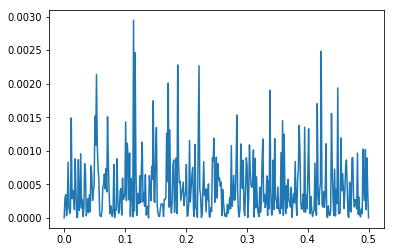

In [3]:


# import data from yahoo finance
z=np.array(df)
# convert data to array in order to manipulate with numpy
y=z[:,5]
# column with close prices
logR=np.diff(np.log(y))
# logarithmic returns
f, Pxx = signal.periodogram(logR)
plt.plot(f, Pxx)
plt.show()

In [17]:
f_s = 1000

(-5, 110)

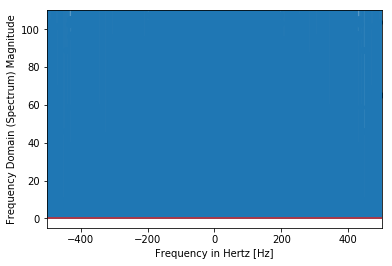

In [18]:
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

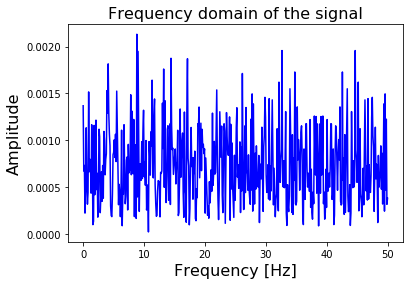

In [21]:
from scipy.fftpack import fft


def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(logR, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

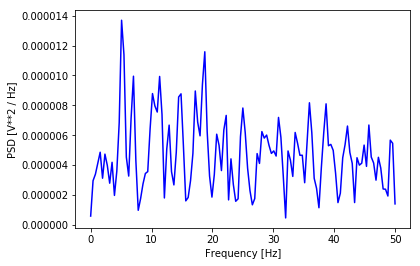

In [24]:
from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 



def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, psd_values = get_psd_values(logR, T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

# quandl

In [26]:
quandl.ApiConfig.api_key = 'H97xoC8cT7zNhZmzcC3s'# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0
